In [22]:
##Instagram Reach Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [6]:
# read data
data =pd.read_csv("Instagram_data.csv", encoding="latin1")
data.head(5)

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [7]:
#check Null values

In [8]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [9]:
#drop null values
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [11]:
# Distribution of impression

Text(0.5, 1.0, 'Distribution of impression from home')

<Figure size 1000x800 with 0 Axes>

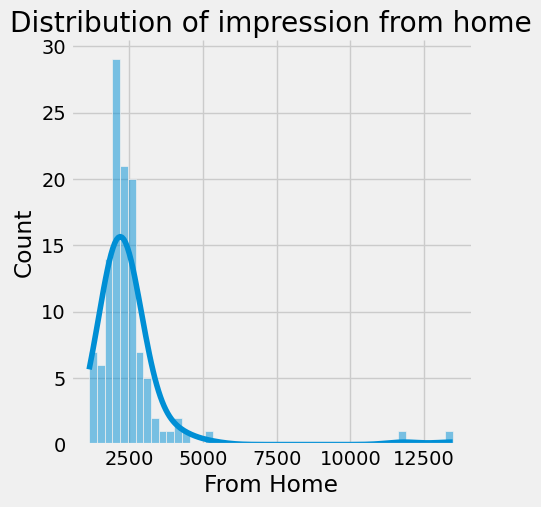

In [12]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["From Home"], kde=True)
plt.title("Distribution of impression from home")

Text(0.5, 1.0, 'Distribution of impression from Hashtags')

<Figure size 1000x800 with 0 Axes>

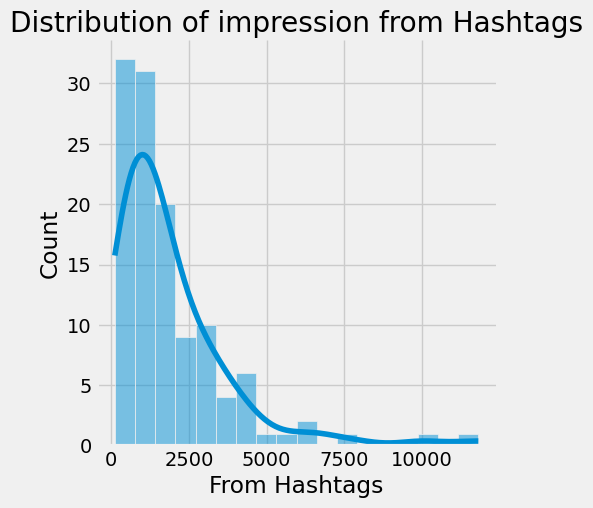

In [13]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["From Hashtags"], kde=True)
plt.title("Distribution of impression from Hashtags")

Text(0.5, 1.0, 'Distribution of impression From Explore')

<Figure size 1000x800 with 0 Axes>

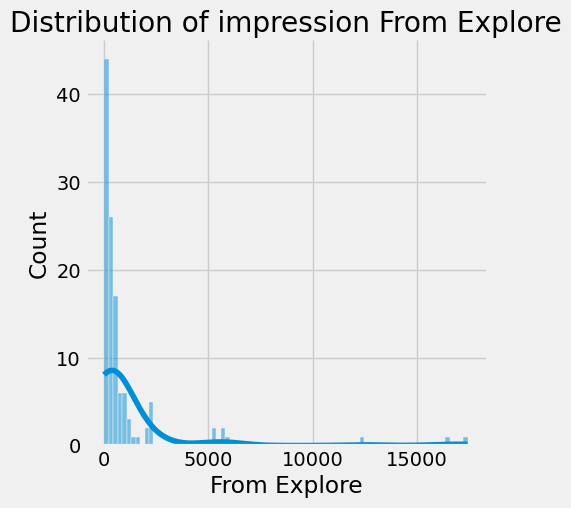

In [14]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["From Explore"], kde=True)
plt.title("Distribution of impression From Explore")

Text(0.5, 1.0, 'Distribution of impression From Other')

<Figure size 1000x800 with 0 Axes>

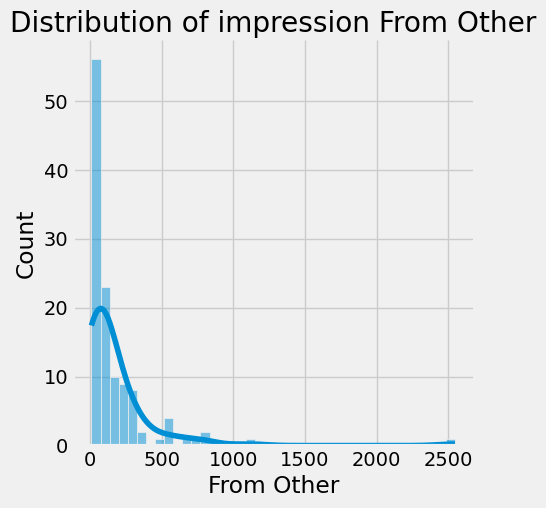

In [15]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["From Other"], kde=True)
plt.title("Distribution of impression From Other")

Text(0.5, 1.0, 'Distribution of impression From Saves')

<Figure size 1000x800 with 0 Axes>

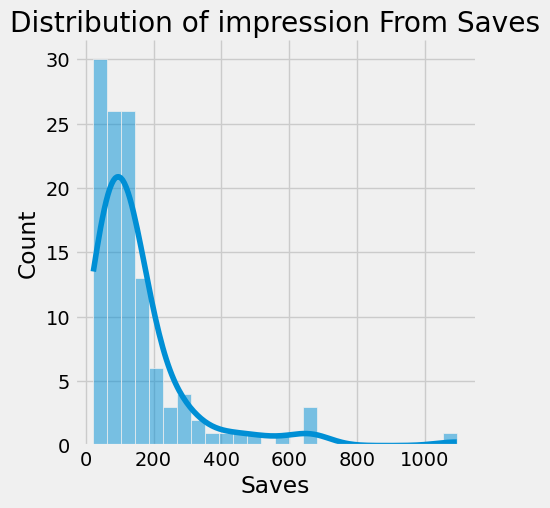

In [16]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["Saves"], kde=True)
plt.title("Distribution of impression From Saves")

Text(0.5, 1.0, 'Distribution of impression From Comments')

<Figure size 1000x800 with 0 Axes>

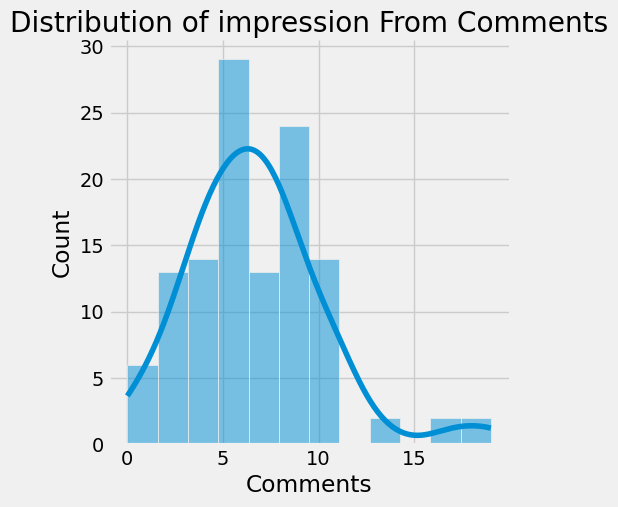

In [17]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["Comments"], kde=True)
plt.title("Distribution of impression From Comments")

Text(0.5, 1.0, 'Distribution of impression From Shares')

<Figure size 1000x800 with 0 Axes>

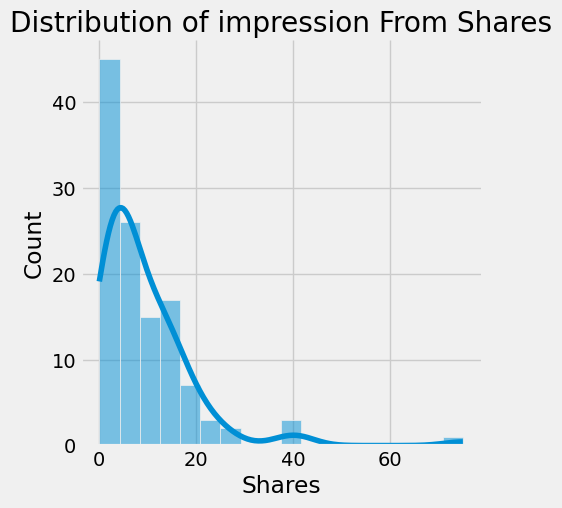

In [18]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["Shares"], kde=True)
plt.title("Distribution of impression From Shares")

Text(0.5, 1.0, 'Distribution of impression From Likes')

<Figure size 1000x800 with 0 Axes>

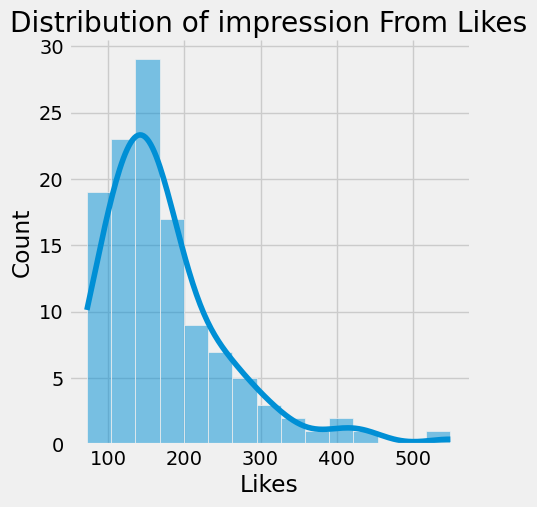

In [19]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["Likes"], kde=True)
plt.title("Distribution of impression From Likes")

Text(0.5, 1.0, 'Distribution of impression From Profile Visits')

<Figure size 1000x800 with 0 Axes>

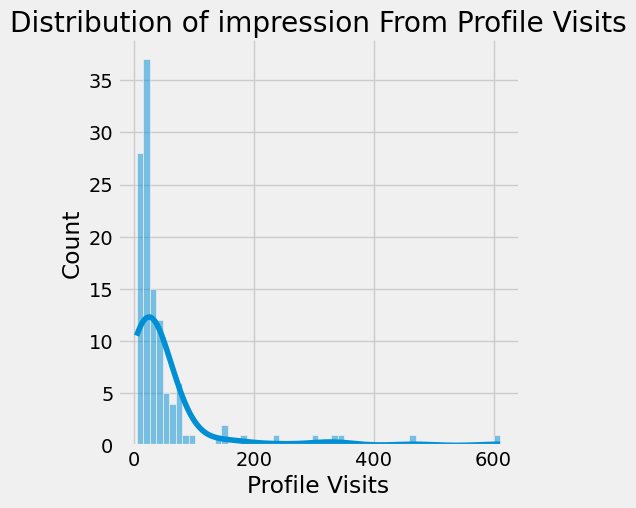

In [20]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["Profile Visits"], kde=True)
plt.title("Distribution of impression From Profile Visits")

Text(0.5, 1.0, 'Distribution of impression From Follows')

<Figure size 1000x800 with 0 Axes>

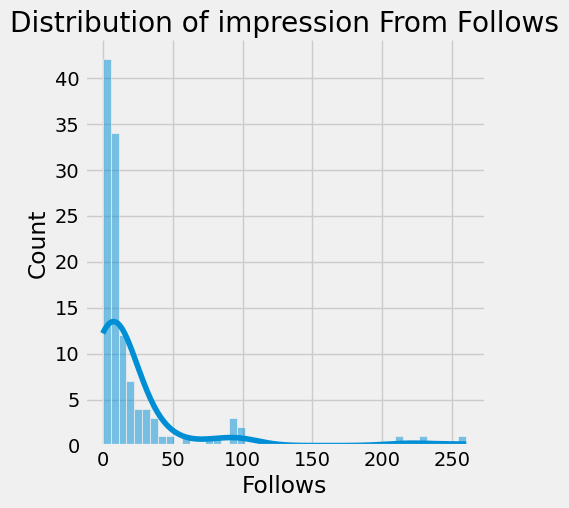

In [21]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.displot(data["Follows"], kde=True)
plt.title("Distribution of impression From Follows")

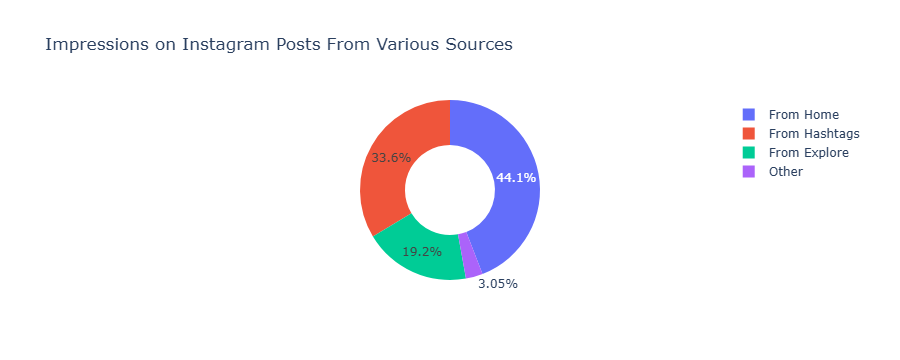

In [22]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

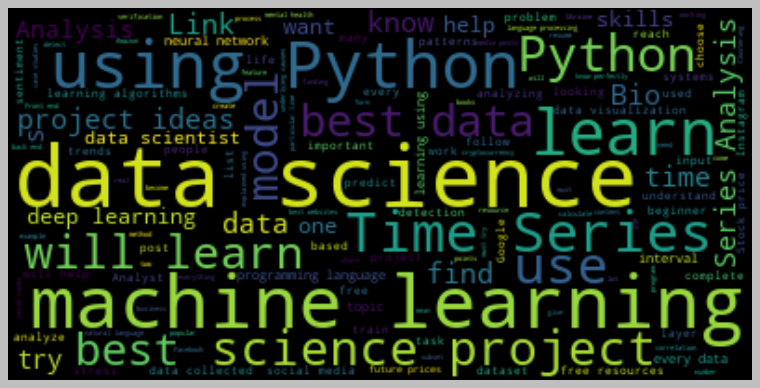

In [23]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

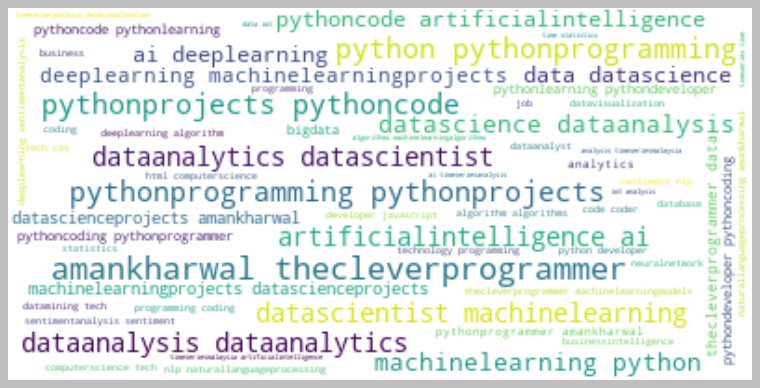

In [24]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

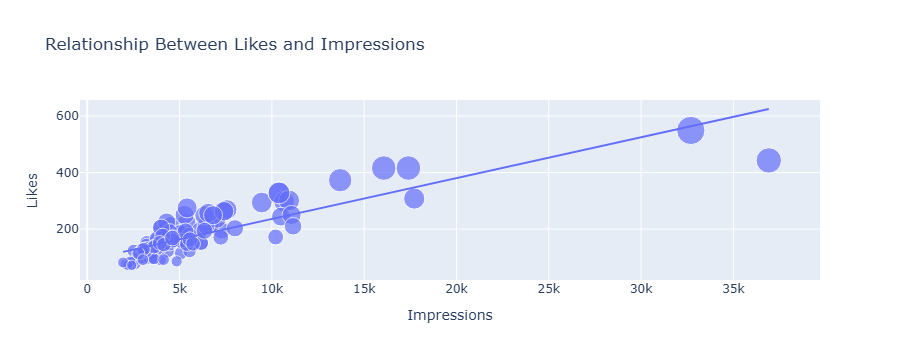

In [25]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

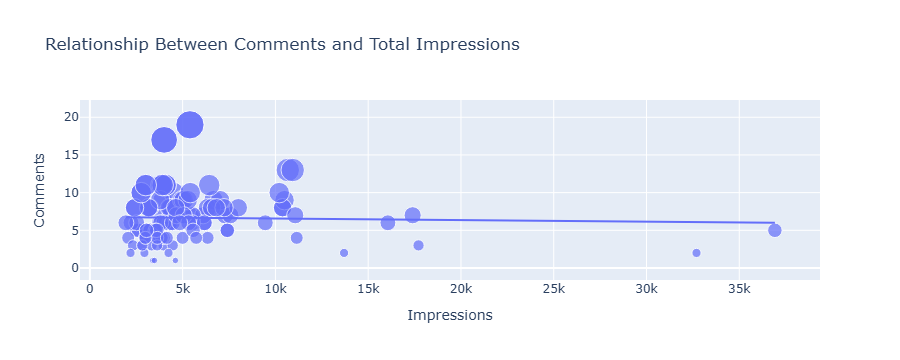

In [26]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

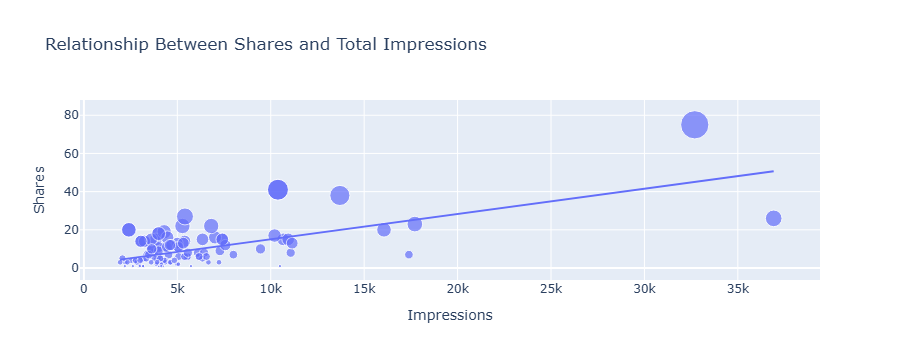

In [27]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [28]:
print(data.dtypes)

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object


In [29]:
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix using only numeric columns
correlation = numeric_data.corr()

# Print the sorted correlation values for "Impressions"
if "Impressions" in correlation.columns:
    print(correlation["Impressions"].sort_values(ascending=False))
else:
    print("Column 'Impressions' not found in numeric data.")

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [31]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


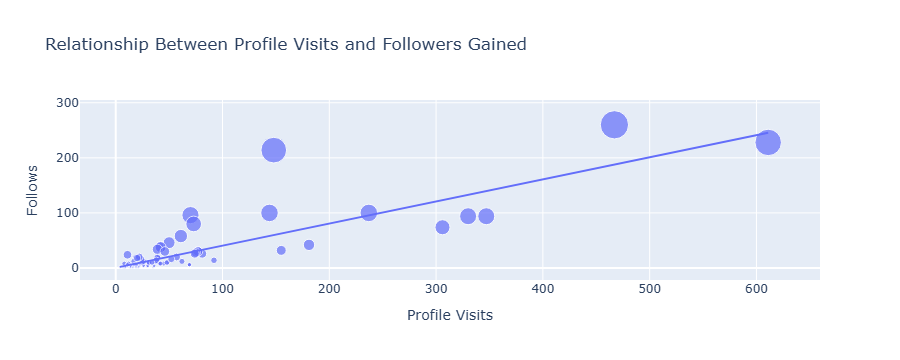

In [60]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [62]:
#instagram Reach Prediction model from user input



x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [66]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [68]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.903910376538958

In [76]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
# features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

likes = float(input("Enter the number of Likes: "))
saves = float(input("Enter the number of Saves: "))
comments = float(input("Enter the number of Comments: "))
shares = float(input("Enter the number of Shares: "))
profile_visits = float(input("Enter the number of Profile Visits: "))
follows = float(input("Enter the number of Follows: "))

# Create the features array
features = np.array([[likes, saves, comments, shares, profile_visits, follows]])

# Predict impressions using the model
impression = model.predict(features)

# Print the impression for the given input
print("Impression for given input:", impression)

Enter the number of Likes:  282
Enter the number of Saves:  233
Enter the number of Comments:  4
Enter the number of Shares:  9
Enter the number of Profile Visits:  165
Enter the number of Follows:  54


Impression for given input: [11381.01856083]
